<a href="https://colab.research.google.com/github/philBram/IT_security/blob/master/tensorflow_classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Simple Binary Classification</h1>

In [147]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.15)

df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'labels': y})

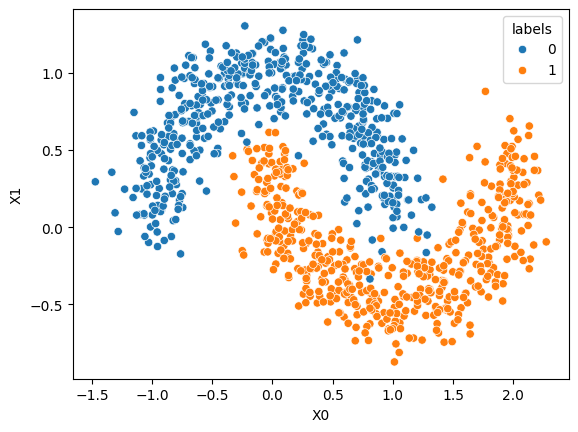

In [148]:
sns.scatterplot(df, x='X0', y='X1', hue='labels')

plt.show()

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
df_norm = pd.DataFrame({'X0': X_train[:, 0], 'X1': X_train[:, 1], 'labels': y_train})

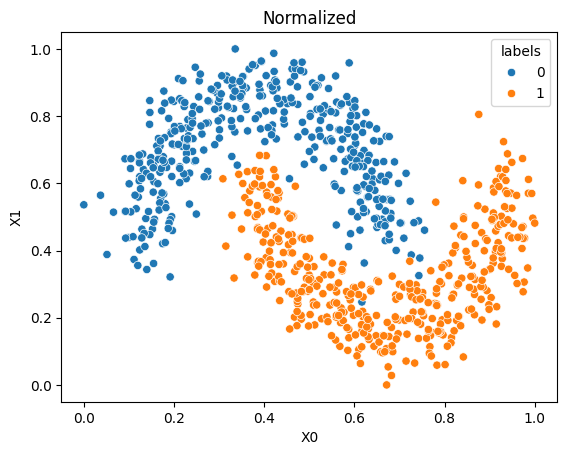

In [151]:
sns.scatterplot(df_norm, x='X0', y='X1', hue='labels')
plt.title('Normalized')

plt.show()

In [152]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

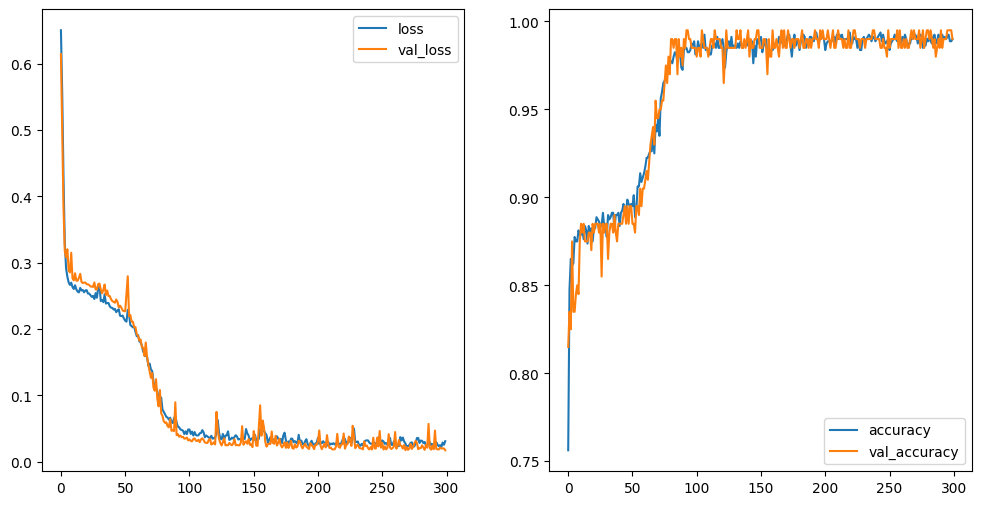

In [153]:
df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(df_history[['loss', 'val_loss']], dashes=False, ax=ax[0])
sns.lineplot(df_history[['accuracy', 'val_accuracy']], dashes=False, ax=ax[1])

plt.show()

In [154]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9900


[0.017295222729444504, 0.9900000095367432]

In [155]:
def plot_decision_boundery(model, X, y, ax):
  x_min, y_min = np.min(X, axis=0)
  x_max, y_max = np.max(X, axis=0)

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)
  y_pred = np.round(y_pred)

  ax.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.5, cmap=plt.cm.RdBu_r)
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)

313/313 [==============================] - 0s 938us/step


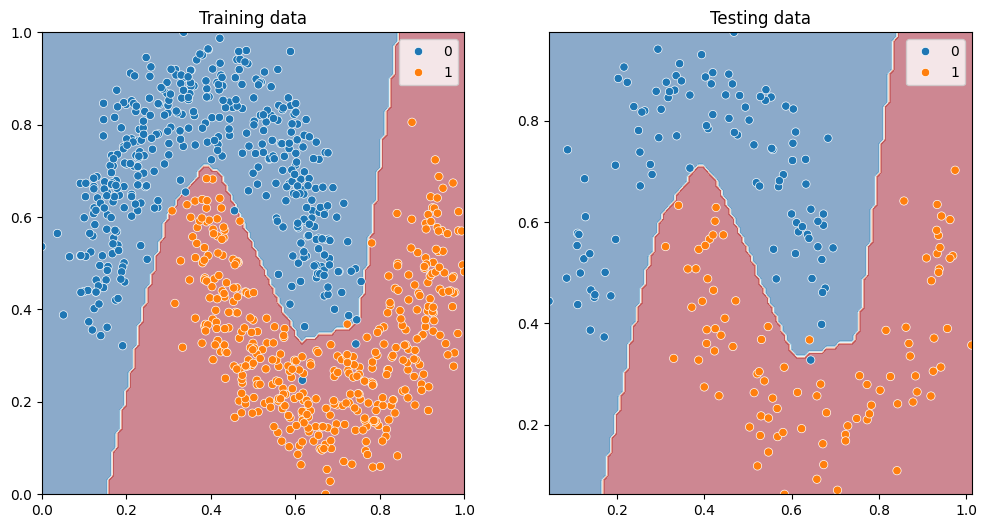

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('Training data')
plot_decision_boundery(model, X_train, y_train, ax[0])

ax[1].set_title('Testing data')
plot_decision_boundery(model, X_test, y_test, ax[1])

plt.show()

<h1>Fashion-mnist Classification</h1>

In [157]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [158]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [159]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [160]:
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

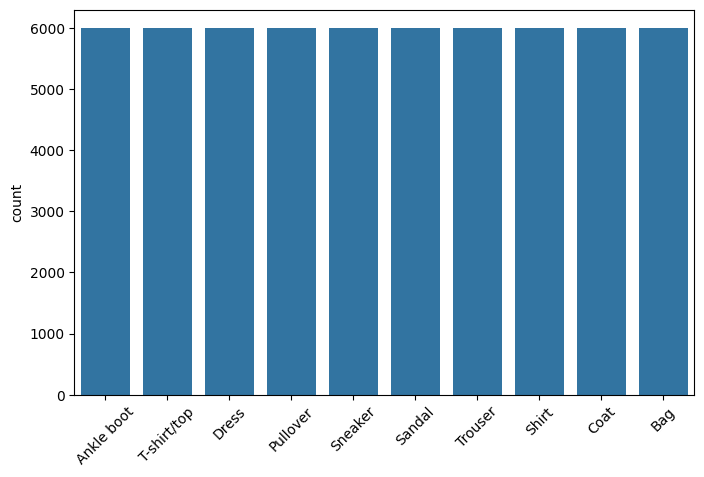

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.tick_params(axis='x', labelrotation=45)
sns.countplot(x=class_names[y_train], ax=ax)

plt.show()

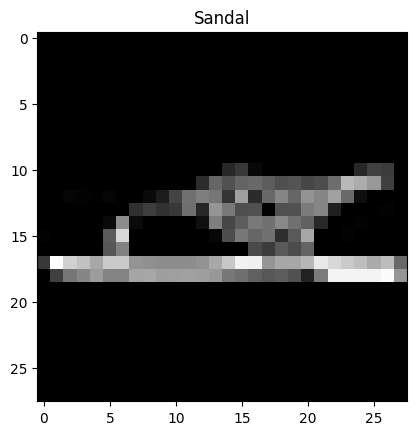

In [162]:
index = np.random.choice(range(len(X_train)))

plt.title(f'{class_names[y_train[index]]}')
plt.imshow(X_train[index], cmap='gray')

plt.show()

In [163]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [164]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10)
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if (epoch + 1) % 11 == 0 else lr * np.exp(-0.1))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train_norm, y_train, epochs=100, validation_data=(X_test_norm, y_test), callbacks=[early_stopping_callback, lr_decay_callback])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6065 - accuracy: 0.7820 - val_loss: 0.4776 - val_accuracy: 0.8305 - lr: 9.0484e-04
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4238 - accuracy: 0.8486 - val_loss: 0.4378 - val_accuracy: 0.8457 - lr: 8.1873e-04
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3851 - accuracy: 0.8594 - val_loss: 0.4434 - val_accuracy: 0.8362 - lr: 7.4082e-04
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3624 - accuracy: 0.8673 - val_loss: 0.3979 - val_accuracy: 0.8592 - lr: 6.7032e-04
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3448 - accuracy: 0.8738 - val_loss: 0.4060 - val_accuracy: 0.8553 - lr: 6.0653e-04
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.8781 - val_loss: 0.3851 - val_accuracy: 0.8634 - lr: 5.4881e-04
Epoch 7/100
1875/1875 [=====

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

df_history = pd.DataFrame(history.history)

sns.lineplot(df_history[['loss', 'val_loss']], ax=ax[0], dashes=False)
sns.lineplot(df_history[['accuracy', 'val_accuracy']], ax=ax[1], dashes=False)
sns.lineplot(df_history['lr'], ax=ax[2], dashes=False)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation=45)

In [ ]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, target_names=class_names, output_dict=True)).T

In [ ]:
def plot_images(model, X, y, row=3, col=3):
  fig, ax = plt.subplots(row, col, figsize=(10, 6))
  y_pred = np.argmax(model.predict(X), axis=1)

  random_choices = np.random.choice(np.arange(len(X)), size=(row * col))

  for pos in range(row * col):
    i_index = pos // col
    j_index = pos % col

    ax[i_index, j_index].axis('off')
    ax[i_index, j_index].set_title(f'true: {class_names[y[random_choices[pos]]]}\n predicted: {class_names[y_pred[random_choices[pos]]]}',
                                   color='green' if y[random_choices[pos]] == y_pred[random_choices[pos]] else 'red')
    ax[i_index, j_index].imshow(X[random_choices[pos]], cmap='gray')

  plt.tight_layout()
  plt.show()

In [ ]:
plot_images(model, X_test, y_test)

In [ ]:
def plot_image_class(model, X, y, class_name, row=3, col=3):
  class_indices = np.where(class_names[y] == class_name)[0]

  fig, ax = plt.subplots(row, 2 * col, figsize=(10, 6))
  fig.suptitle(f'{class_name}', fontsize=18)

  y_pred_full = model.predict(X)
  y_pred = np.argmax(y_pred_full, axis=1)

  random_choices = np.random.choice(class_indices, size=(2 * row * col))

  for pos in np.arange(0, 2 * row * col, 2):
    i_index = pos // (2 * col)
    j_index = pos % (2 * col)

    ax[i_index, j_index].axis('off')
    ax[i_index, j_index].imshow(X[random_choices[pos]], cmap='gray')

    ax[i_index, j_index + 1].set_yticks([])
    ax[i_index, j_index + 1].set_title(f'predict: {class_names[y_pred[random_choices[pos]]]}',
                                       color='green' if y[random_choices[pos]] == y_pred[random_choices[pos]] else 'red')
    sns.barplot(x=range(len(class_names)), y=y_pred_full[random_choices[pos]], ax=ax[i_index, j_index + 1])

  plt.tight_layout()
  plt.show()

In [ ]:
plot_image_class(model, X_test, y_test, class_name='T-shirt/top')